In [1]:
import pandas as pd
import sklearn as scikit
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Initialize data to be from the excel sheet
file_name = "default of credit card clients.xls"
raw_data = pd.read_excel(file_name)

In [3]:
print(raw_data)

      Unnamed: 0         X1   X2         X3        X4   X5     X6     X7  \
0             ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2   
1              1      20000    2          2         1   24      2      2   
2              2     120000    2          2         2   26     -1      2   
3              3      90000    2          2         2   34      0      0   
4              4      50000    2          2         1   37      0      0   
...          ...        ...  ...        ...       ...  ...    ...    ...   
29996      29996     220000    1          3         1   39      0      0   
29997      29997     150000    1          3         2   43     -1     -1   
29998      29998      30000    1          2         2   37      4      3   
29999      29999      80000    1          3         1   41      1     -1   
30000      30000      50000    1          2         1   46      0      0   

          X8     X9  ...        X15        X16        X17       X18       X19  \
0     

NOTE: Our original data has the labels underneath arbitrary x1,x2,...xn labels. We will omit fix the formate of the dataframe first to have the proper labels in the dataframe.

In [4]:
# Format of data frame is configured incorrectly. We will fix format here...
# Fixing the dataframes labels...
raw_data.columns = raw_data.iloc[0]
# Removing labels from being within the dataframe...
raw_data = raw_data.iloc[1:,:]
#Removing first column ID from within the dataframe as not relevent to our models
raw_data = raw_data.iloc[:,1:]


raw_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Now with our data initialized, lets take a moment to explore the distribution of our classes

In [5]:
# Define a function to plot the distribution of a column
def plot_distribution(df, column):
    # Get the number of unique values in the column
    num_unique_values = df[column].nunique()
    df[column].hist(bins=num_unique_values, figsize=(10,5))
    plt.xlabel(column)
    plt.ylabel('Number of people')
    plt.title(f'Distribution of {column}')
    plt.show()

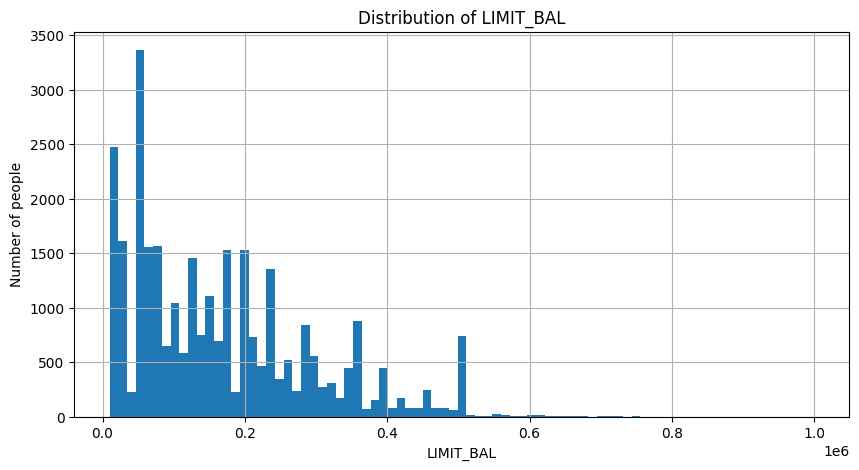

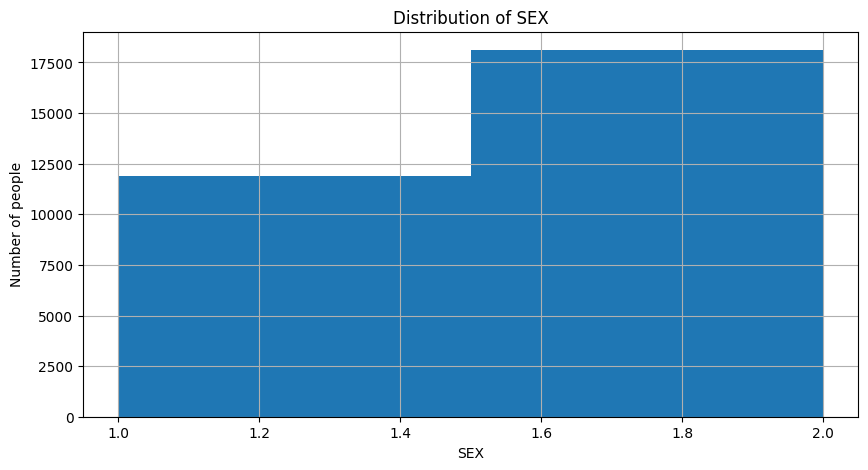

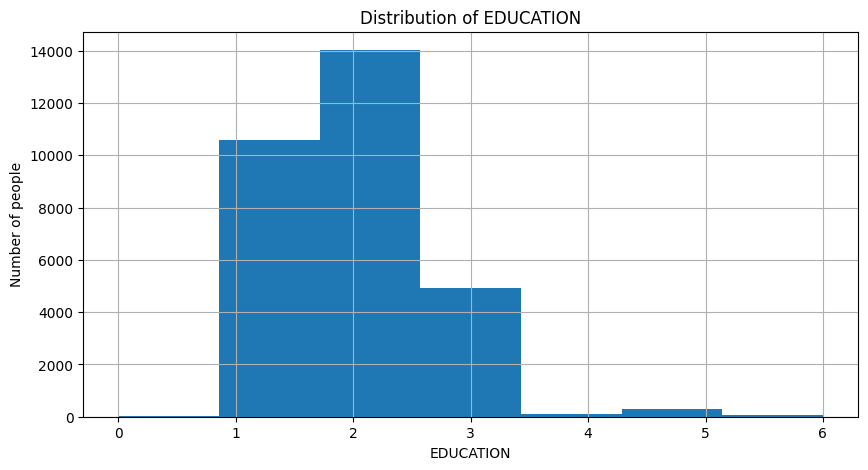

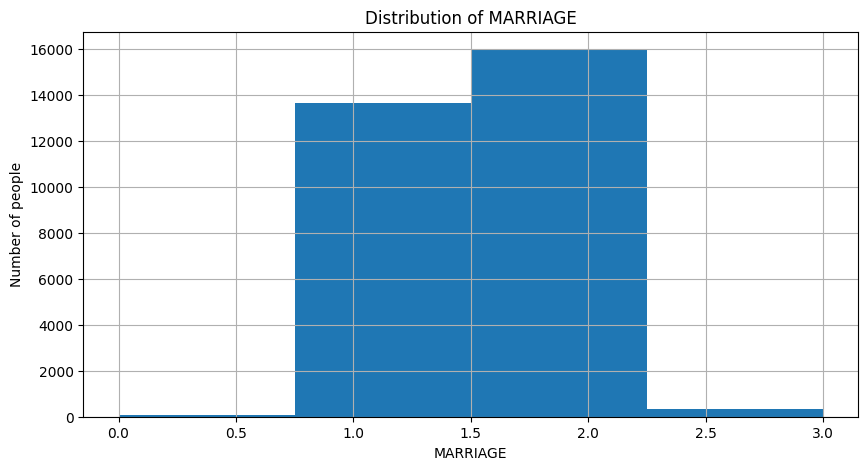

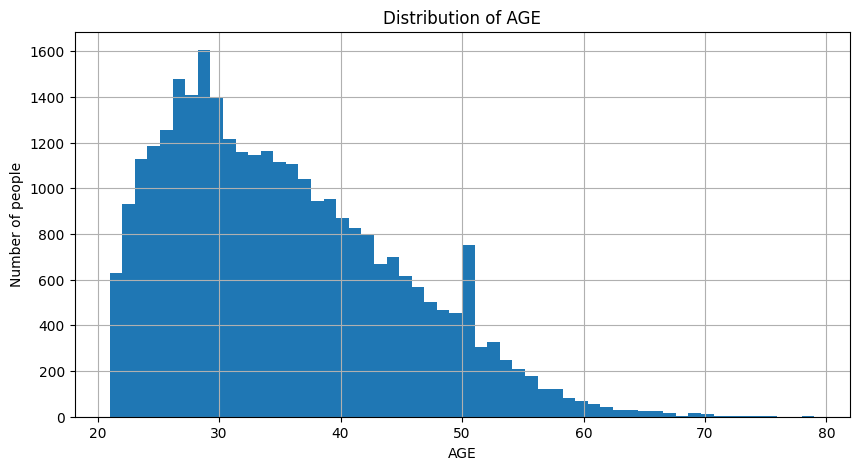

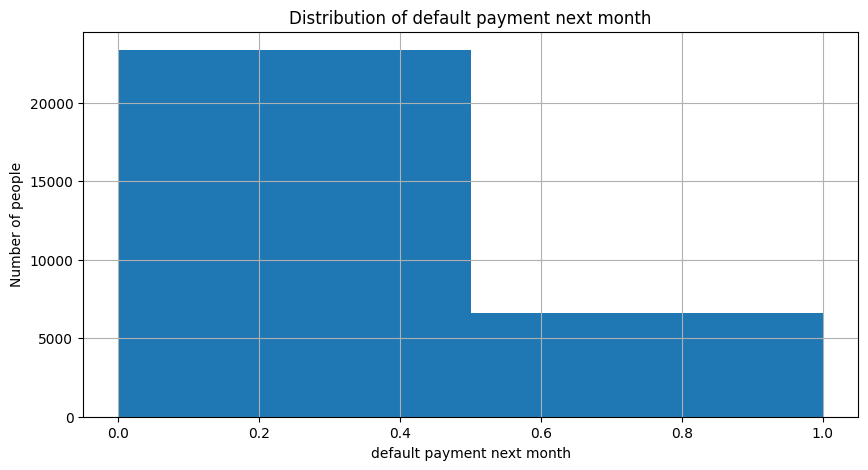

In [6]:
plot_distribution(raw_data, 'LIMIT_BAL') # limit_balance
plot_distribution(raw_data, 'SEX') # sex
plot_distribution(raw_data, 'EDUCATION') # Education
plot_distribution(raw_data, 'MARRIAGE') # Marriage
plot_distribution(raw_data, 'AGE') # Age
plot_distribution(raw_data, 'default payment next month') #default

There happens to be a few items that are not defined int he dataset and therefore will be removed.

In [7]:
data = raw_data[raw_data['MARRIAGE'] != 0]
data = data[data['EDUCATION'] < 4]
data = data[data['EDUCATION'] != 0]

# Reverse the order of the time series columns so that the months are in order...
data.iloc[:, 5:11] = data.iloc[:, 10:4:-1].values
data.iloc[:, 11:17] = data.iloc[:, 16:10:-1].values
data.iloc[:, 17:23] = data.iloc[:, 22:16:-1].values

In [8]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,-2,-2,-1,-1,2,...,689,3102,3913,0,0,0,0,689,0,1
2,120000,2,2,2,26,2,0,0,0,2,...,2682,1725,2682,2000,0,1000,1000,1000,0,1
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14027,29239,5000,1000,1000,1000,1500,1518,0
4,50000,2,2,1,37,0,0,0,0,0,...,49291,48233,46990,1000,1069,1100,1200,2019,2000,0
5,50000,1,2,1,57,0,0,0,-1,0,...,35835,5670,8617,679,689,9000,10000,36681,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,208365,192815,188948,1000,5000,3047,5003,20000,8500,0
29997,150000,1,3,2,43,0,0,-1,-1,-1,...,3502,1828,1683,0,0,129,8998,3526,1837,0
29998,30000,1,2,2,37,0,0,-1,2,3,...,2758,3356,3565,3100,2000,4200,22000,0,0,1
29999,80000,1,3,1,41,-1,0,0,0,-1,...,76304,78379,-1645,1804,52964,1926,1178,3409,85900,1


NOTE: After removal, we see that we lost 522 points, a 0.01% loss of our data. This loss of information may help with fitting of our models since the data is more "correct" now. Distribution is not affected and therefore, the process remains valid

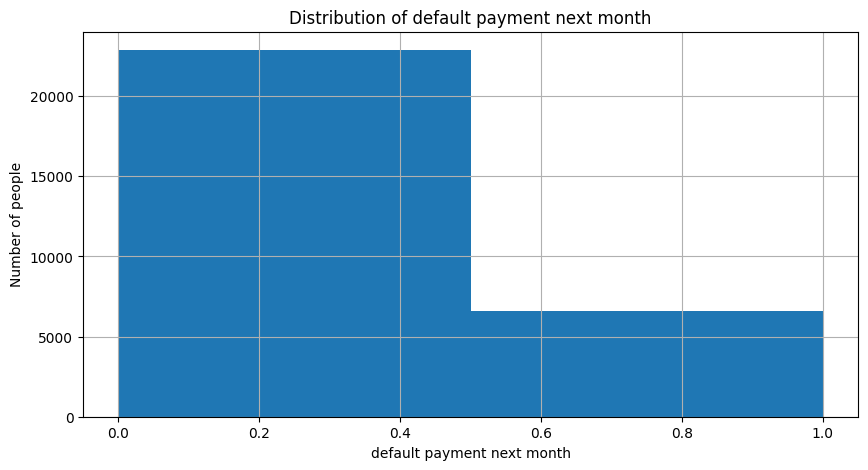

In [9]:
plot_distribution(data, 'default payment next month')

We can see that our data is imbalanced and has a skewed nature to it. We should try different methods to get a better representation to work on. However, for now let us work with the entire data frame to gain a reference.

Let us do simple preprocessing to get our split datasets ready.

In [10]:
from sklearn.model_selection import train_test_split

# Assuming raw_data is your DataFrame and `defalut payment next month` is the target variable
X = data.drop('default payment next month', axis=1)
y = data['default payment next month']

# Split the data into training, validation, and test sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0.2

# Split the training set into demographic and time series data
X_demographic_train = X_train[['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
X_time_series_train = X_train.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)

# Reshape time series training data to be 3D for the LSTM (samples, timesteps, features)
X_time_series_train = X_time_series_train.values.reshape(-1,3,6)



# Do the same for the validation set
X_demographic_val = X_val[['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
X_time_series_val = X_val.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)
X_time_series_val = X_time_series_val.values.reshape(-1,3,6)

# And the test set
X_demographic_test = X_test[['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
X_time_series_test = X_test.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)
X_time_series_test = X_time_series_test.values.reshape(-1, 3, 6)

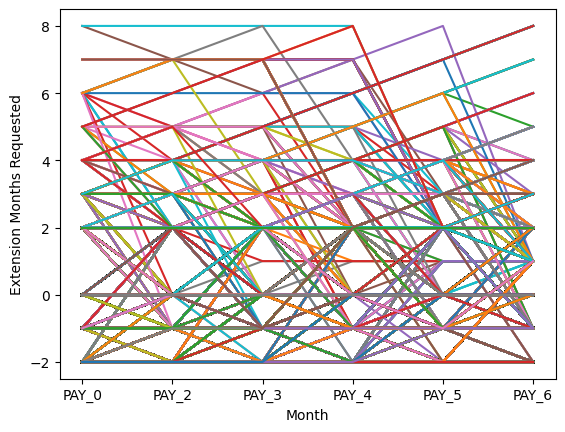

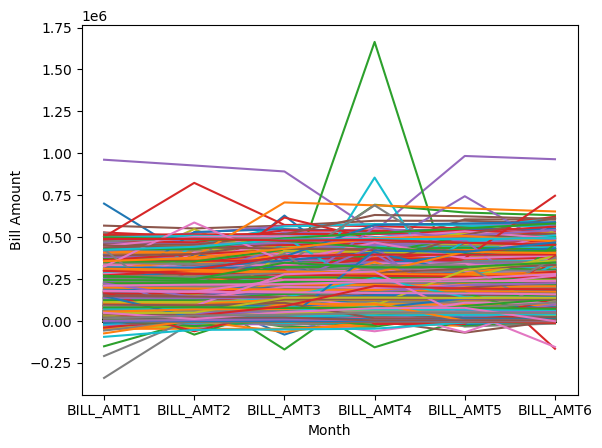

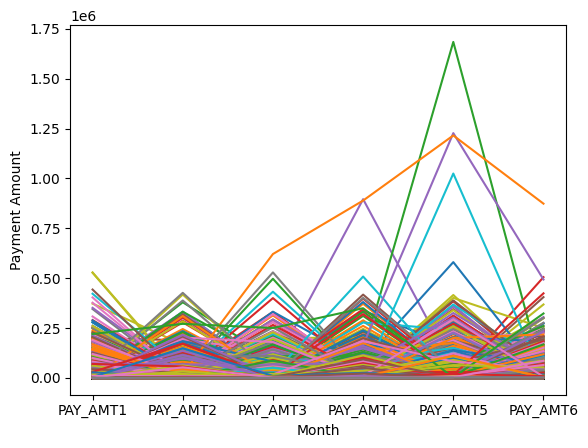

In [11]:
# Select columns 6-11 (Python uses 0-based indexing)
selected_columns = X.iloc[:, 5:11]

# Create a new figure
plt.figure()

# For each row (user) in the DataFrame, plot their data
for index, row in selected_columns.iterrows():
    plt.plot(row.index, row.values)

# Set the x and y axis labels
plt.xlabel('Month')
plt.ylabel('Extension Months Requested')

# Show the plot
plt.show()

# Select columns 12-17 and plot
selected_columns = X.iloc[:, 11:17]
plt.figure()
for index, row in selected_columns.iterrows():
    plt.plot(row.index, row.values)
plt.xlabel('Month')
plt.ylabel('Bill Amount')
plt.show()

# Select columns 18-23 and plot
selected_columns = X.iloc[:, 17:23]
plt.figure()
for index, row in selected_columns.iterrows():
    plt.plot(row.index, row.values)
plt.xlabel('Month')
plt.ylabel('Payment Amount')
plt.show()



In [12]:
# Convert the frame to float32 to work with neural networks
X_time_series_train = X_time_series_train.astype('float32')
X_demographic_train = X_demographic_train.astype('float32')
X_time_series_val = X_time_series_val.astype('float32')
X_demographic_val = X_demographic_val.astype('float32')
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')

X_time_series_test = X_time_series_test.astype('float32')
X_demographic_test = X_demographic_test.astype('float32')
y_test = y_test.astype('float32')


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN
import random as rn

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(0)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
rn.seed(0)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(0)


In [14]:
# Define the model: This will be LSTM using all data...
model = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model.add(LSTM(units=50, dropout=0.2, input_shape=(3,6)))

# Add Dense layer for demographic data
model.add(Dense(units=X_demographic_train.shape[1]))

# Add final Dense layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model.fit([X_time_series_train, X_demographic_train], y_train, validation_data=([X_time_series_val, X_demographic_val], y_val), batch_size=32, epochs=10)

Epoch 1/10


/Users/diegoozuna/Desktop/LSTM-Credit Default/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - accuracy: 0.7676 - loss: 0.5414 - val_accuracy: 0.7765 - val_loss: 0.4969
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.7940 - loss: 0.4744 - val_accuracy: 0.7941 - val_loss: 0.4734
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.8065 - loss: 0.4586 - val_accuracy: 0.7946 - val_loss: 0.4686
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.8081 - loss: 0.4539 - val_accuracy: 0.7955 - val_loss: 0.4685
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.8149 - loss: 0.4501 - val_accuracy: 0.7995 - val_loss: 0.4640
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.8174 - loss: 0.4479 - val_accuracy: 0.8002 - val_loss: 0.4638
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.8115 - loss: 0.4508 - val_accuracy: 0.8043 - val_loss: 0.4645
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.8131 - loss: 0.4503 - val_accurac

In [15]:
# Define the model: This will be RNN using all data...
model2 = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model2.add(SimpleRNN(units=50, dropout=0.2, input_shape=(3, 6)))

# Add Dense layer for demographic data
model2.add(Dense(units=X_demographic_train.shape[1]))

# Add final Dense layer for binary classification
model2.add(Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model2.fit([X_time_series_train, X_demographic_train], y_train, validation_data=([X_time_series_val, X_demographic_val], y_val), batch_size=32, epochs=10)

Epoch 1/10


/Users/diegoozuna/Desktop/LSTM-Credit Default/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.6735 - loss: 0.7258 - val_accuracy: 0.7741 - val_loss: 0.5428
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.7853 - loss: 0.5286 - val_accuracy: 0.7744 - val_loss: 0.5321
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.7851 - loss: 0.5193 - val_accuracy: 0.7737 - val_loss: 0.5341
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.7859 - loss: 0.5208 - val_accuracy: 0.7741 - val_loss: 0.5305
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.7862 - loss: 0.5165 - val_accuracy: 0.7743 - val_loss: 0.5325
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.7861 - loss: 0.5168 - val_accuracy: 0.7741 - val_loss: 0.5320
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.7862 - loss: 0.5173 - val_accuracy: 0.7744 - val_loss: 0.5298
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.7857 - loss: 0.5160 - val_accurac

In [16]:
# Define the model: This will be LSTM using time-series only...
model3 = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model3.add(LSTM(units=50, dropout=0.2, input_shape=(3, 6)))

# Add Dense layer for binary classification
model3.add(Dense(1, activation='sigmoid'))

# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model3.fit([X_time_series_train], y_train, validation_data=([X_time_series_val], y_val), batch_size=32, epochs=10)

Epoch 1/10


/Users/diegoozuna/Desktop/LSTM-Credit Default/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - accuracy: 0.6353 - loss: 0.6371 - val_accuracy: 0.7761 - val_loss: 0.4992
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.7910 - loss: 0.4810 - val_accuracy: 0.7943 - val_loss: 0.4748
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.8051 - loss: 0.4646 - val_accuracy: 0.7966 - val_loss: 0.4703
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.8115 - loss: 0.4577 - val_accuracy: 0.7994 - val_loss: 0.4667
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.8111 - loss: 0.4535 - val_accuracy: 0.8029 - val_loss: 0.4682
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.8163 - loss: 0.4527 - val_accuracy: 0.8000 - val_loss: 0.4651
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.8141 - loss: 0.4505 - val_accuracy: 0.8007 - val_loss: 0.4641
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.8198 - loss: 0.4458 - val_accurac

In [17]:
# Define the model: This will be RNN using time-series only...
model4 = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model4.add(SimpleRNN(units=50, dropout=0.2, input_shape=(3, 6)))

# Add Dense layer for binary classification
model4.add(Dense(1, activation='sigmoid'))

# Compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model4.fit([X_time_series_train], y_train, validation_data=([X_time_series_val], y_val), batch_size=32, epochs=10)

Epoch 1/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 679us/step - accuracy: 0.7315 - loss: 0.5830 - val_accuracy: 0.7739 - val_loss: 0.5411
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.7830 - loss: 0.5320 - val_accuracy: 0.7737 - val_loss: 0.5368
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.7839 - loss: 0.5278 - val_accuracy: 0.7737 - val_loss: 0.5374
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.7860 - loss: 0.5240 - val_accuracy: 0.7739 - val_loss: 0.5317
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.7861 - loss: 0.5208 - val_accuracy: 0.7741 - val_loss: 0.5304
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.7857 - loss: 0.5181 - val_accuracy: 0.7744 - val_loss: 0.5294
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.7867 - loss: 0.5168 - val_accuracy: 0.7743 - val_loss: 0.5283
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.7864 - loss: 0.5176 - 

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score #will be used to printInfo of models

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def printInfo(model, inputs):
    # Use the model to make predictions
    y_pred_prob = model.predict(inputs)

    # Apply a threshold to get strict 0 or 1 values
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Now compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = np.mean([cm[i,i]/(np.sum(cm[:,i])) for i in range(cm.shape[0])])

    # Print the metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Specificity: {specificity}")

    # Draw the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()


185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step
Accuracy: 0.8217435549525102
Precision: 0.6867977528089888
Recall: 0.3712984054669704
Specificity: 0.7635377652933832


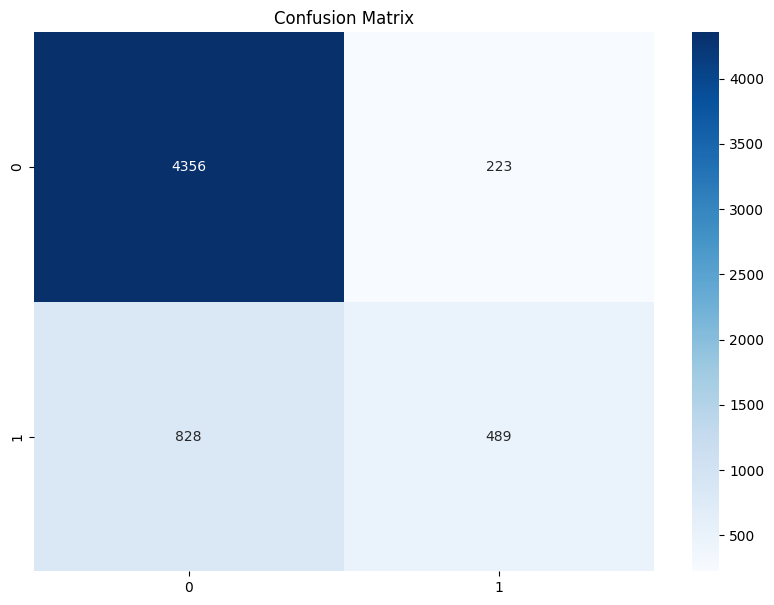

In [20]:
printInfo(model, [X_time_series_test, X_demographic_test])

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step
Accuracy: 0.7790027137042063
Precision: 0.71875
Recall: 0.017463933181473046
Specificity: 0.7490407571623465


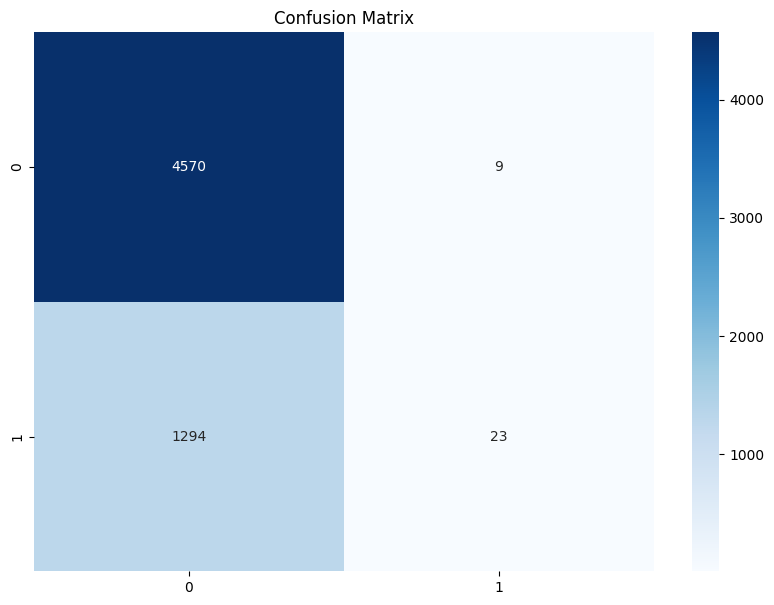

In [21]:
printInfo(model2, [X_time_series_test, X_demographic_test])

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step
Accuracy: 0.819538670284939
Precision: 0.6744827586206896
Recall: 0.3712984054669704
Specificity: 0.7571794957288325


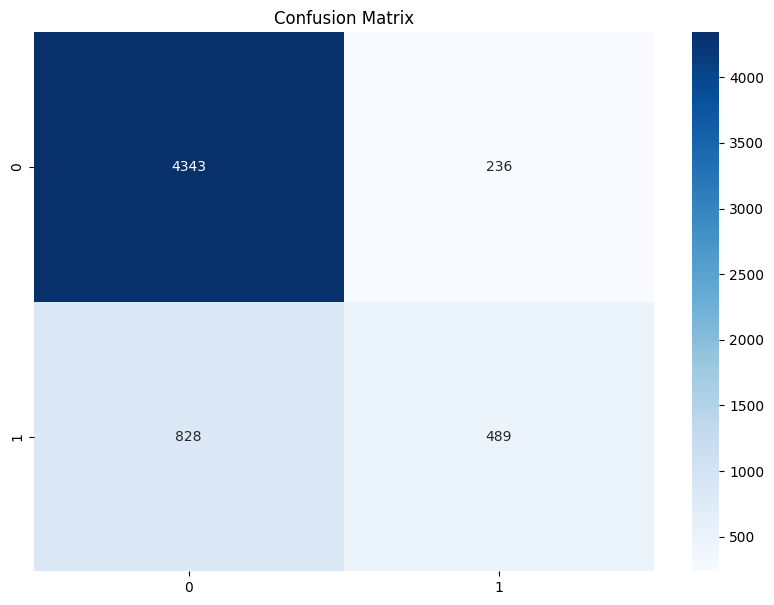

In [22]:
printInfo(model3, X_time_series_test)

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step
Accuracy: 0.7790027137042063
Precision: 0.7058823529411765
Recall: 0.018223234624145785
Specificity: 0.7426545848636281


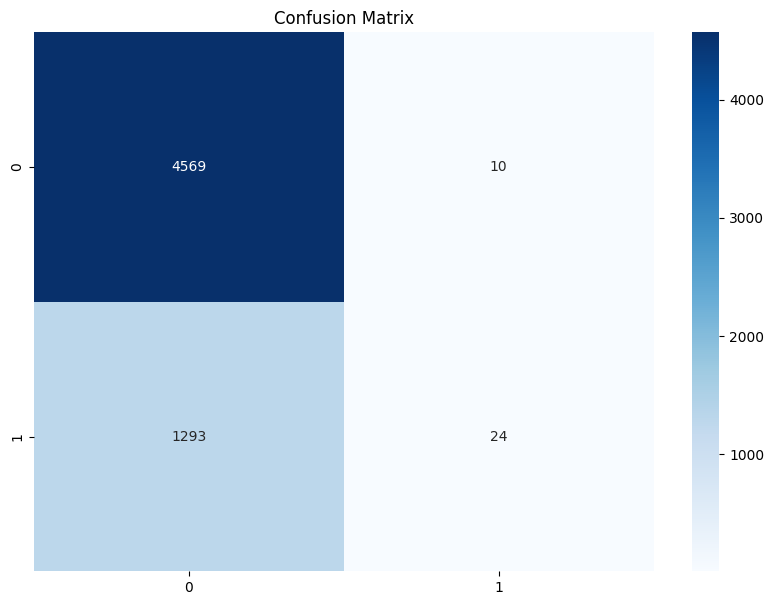

In [23]:
printInfo(model4, X_time_series_test)

# Let us try to get a good model based on relevent data only (i.e only time series)

Let us try to make the model more "focused" Lets have layers that look at the one-to-one relation prior to applying a relation overall datapoints.

In [24]:
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras_self_attention import SeqWeightedAttention
from keras.regularizers import l2

# Define the model
attentionLSTM = Sequential()

# Add first LSTM layer with return_sequences=True
attentionLSTM.add(LSTM(units=36, dropout=0.2, return_sequences=True, input_shape=(3, 6), kernel_regularizer=l2(0.03)))

# Add second LSTM layer
attentionLSTM.add(LSTM(units=18, dropout=0.2, return_sequences=True, kernel_regularizer=l2(0.03)))

# Add attention layer
attentionLSTM.add(SeqWeightedAttention())

# Add Dropout layer
attentionLSTM.add(Dropout(0.1))

# Add Dense layer for binary classification
attentionLSTM.add(Dense(1, activation='sigmoid'))

# Compile the model
attentionLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
attentionLSTM.fit(X_time_series_train, y_train, validation_data=(X_time_series_val, y_val), batch_size=32, epochs=10)


Epoch 1/10


/Users/diegoozuna/Desktop/LSTM-Credit Default/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7253 - loss: 1.1966 - val_accuracy: 0.7702 - val_loss: 0.5340
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7856 - loss: 0.5152 - val_accuracy: 0.7705 - val_loss: 0.5146
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7972 - loss: 0.5004 - val_accuracy: 0.7868 - val_loss: 0.5058
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8018 - loss: 0.4939 - val_accuracy: 0.7887 - val_loss: 0.5020
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8043 - loss: 0.4859 - val_accuracy: 0.7929 - val_loss: 0.4979
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8077 - loss: 0.4850 - val_accuracy: 0.7949 - val_loss: 0.4958
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8095 - loss: 0.4811 - val_accuracy: 0.7961 - val_loss: 0.4923
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8118 - loss: 0.4781 - val_accuracy: 0.7951 - val_

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8137720488466758
Precision: 0.7142857142857143
Recall: 0.2771450265755505
Specificity: 0.7687491709775832


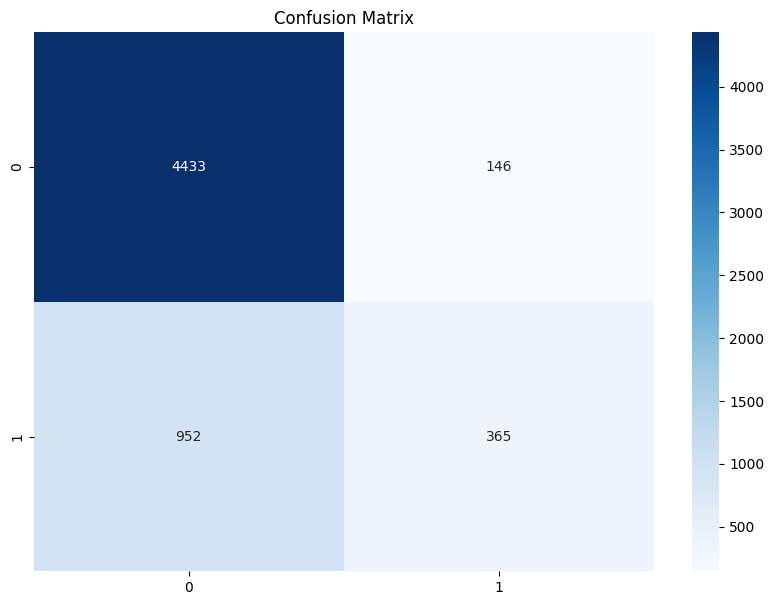

In [25]:
printInfo(attentionLSTM, X_time_series_test)

Lets try some further preprocessing to potentially improve our results...

In [26]:
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import NearMiss

y = y.astype('int')

# standardize the features
scaler = StandardScaler()
#keep the same splits we had and just apply the scaler
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, index=X_val.index, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)


Note: we have X_resampled and y_resampled and we need to split these into train/test sets again....

This time around however, we will only extract the time series data

In [28]:
# Split away the time series data again...
X_time_series_train_scaled = X_train_scaled.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)

# Reshape time series training data to be 3D for the LSTM (samples, timesteps, features)
X_time_series_train_scaled = X_time_series_train_scaled.values.reshape(-1,3,6)

# Do the same for the validation set
X_time_series_val_scaled = X_val.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)
X_time_series_val_scaled = X_time_series_val_scaled.values.reshape(-1,3,6)

# And the test set
X_time_series_test_scaled = X_test_scaled.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)
X_time_series_test_scaled = X_time_series_test_scaled.values.reshape(-1,3,6)


# Convert the frames to float32 to work with neural networks
X_time_series_train_scaled = X_time_series_train_scaled.astype('float32')
X_time_series_val_scaled = X_time_series_val_scaled.astype('float32')
X_time_series_test_scaled = X_time_series_test_scaled.astype('float32')

y_train = y_train.astype('float32')
y_val = y_val.astype('float32')
y_test = y_test.astype('float32')


In [29]:
#REPEAT OUR STRUCUTRE OF BEST MODEL SO FAR ON THIS NEW DATASET
# Define the model
attentionLSTM_s = Sequential()

# Add first LSTM layer with return_sequences=True
attentionLSTM_s.add(LSTM(units=36, dropout=0.2, return_sequences=True, input_shape=(3,6)))

# Add second LSTM layer
attentionLSTM_s.add(LSTM(units=18, dropout=0.2, return_sequences=True))

# Add attention layer
attentionLSTM_s.add(SeqWeightedAttention())

# Add Dropout layer
attentionLSTM_s.add(Dropout(0.1))

# Add Dense layer for binary classification
attentionLSTM_s.add(Dense(1, activation='sigmoid'))

# Compile the model
attentionLSTM_s.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
attentionLSTM_s.fit(X_time_series_train_scaled, y_train, validation_data=(X_time_series_val_scaled, y_val), batch_size=32, epochs=10)


Epoch 1/10


/Users/diegoozuna/Desktop/LSTM-Credit Default/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7832 - loss: 0.5488 - val_accuracy: 0.7659 - val_loss: 0.5314
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8122 - loss: 0.4503 - val_accuracy: 0.7668 - val_loss: 0.5190
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8165 - loss: 0.4468 - val_accuracy: 0.7620 - val_loss: 0.5325
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8174 - loss: 0.4445 - val_accuracy: 0.7619 - val_loss: 0.5070
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8162 - loss: 0.4455 - val_accuracy: 0.7860 - val_loss: 0.4943
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8158 - loss: 0.4440 - val_accuracy: 0.7731 - val_loss: 0.4984
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8176 - loss: 0.4424 - val_accuracy: 0.7832 - val_loss: 0.4952
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8187 - loss: 0.4427 - val_accuracy: 0.7963 - val_

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8044436906377205
Precision: 0.5987951807228916
Recall: 0.3773728170083523
Specificity: 0.7184658888217695


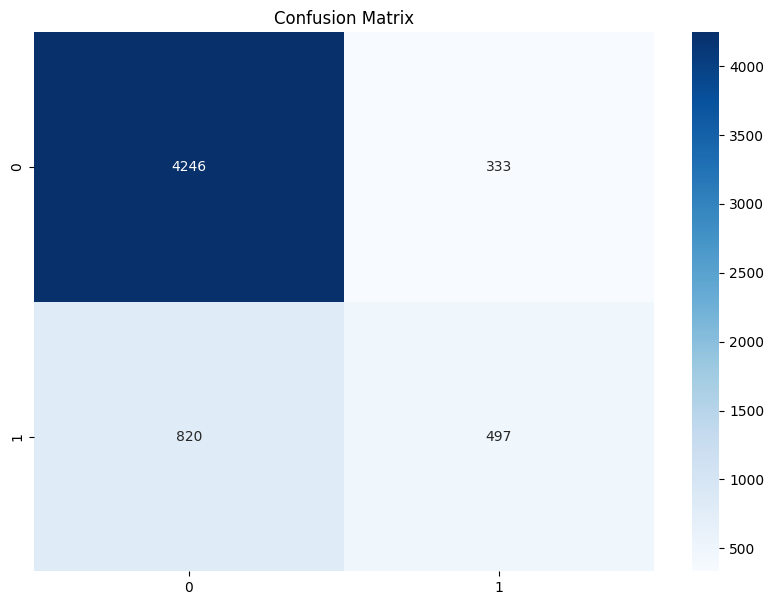

In [30]:
printInfo(attentionLSTM_s, X_time_series_test)

In [31]:
# Define the model: This will be LSTM using time-series only...
model5 = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model5.add(LSTM(units=18, dropout=0.2, input_shape=(3, 6)))

# Add Dense layer for binary classification
model5.add(Dense(1, activation='sigmoid'))

# Compile the model
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model5.fit([X_time_series_train], y_train, validation_data=([X_time_series_val], y_val), batch_size=32, epochs=10)

Epoch 1/10


/Users/diegoozuna/Desktop/LSTM-Credit Default/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.6999 - loss: 0.6031 - val_accuracy: 0.7654 - val_loss: 0.5312
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.7781 - loss: 0.5144 - val_accuracy: 0.7741 - val_loss: 0.4981
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.7852 - loss: 0.4810 - val_accuracy: 0.7793 - val_loss: 0.4773
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.7969 - loss: 0.4626 - val_accuracy: 0.7921 - val_loss: 0.4678
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.8060 - loss: 0.4540 - val_accuracy: 0.8024 - val_loss: 0.4659
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.8116 - loss: 0.4494 - val_accuracy: 0.8033 - val_loss: 0.4655
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.8133 - loss: 0.4497 - val_accuracy: 0.8055 - val_loss: 0.4638
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.8114 - loss: 0.4530 - val_accurac

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
Accuracy: 0.8185210312075983
Precision: 0.6447831184056272
Recall: 0.4176157934700076
Specificity: 0.7463455548403309


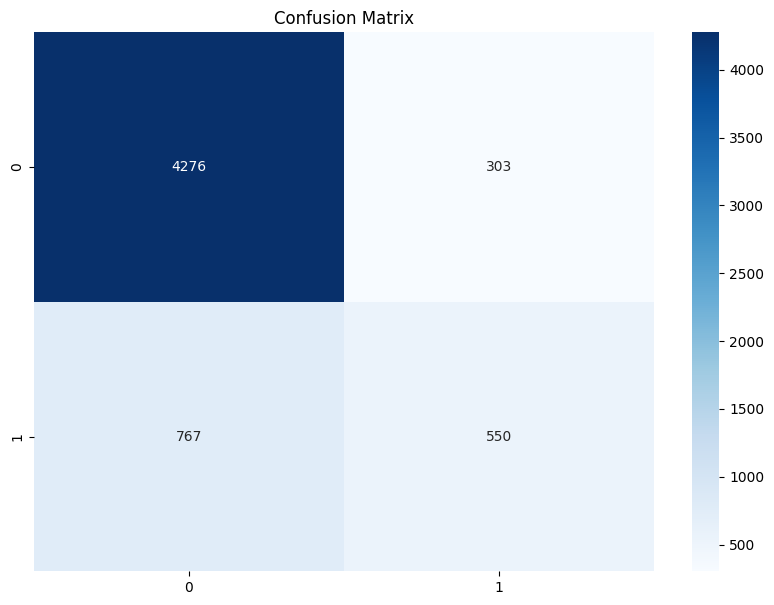

In [32]:
printInfo(model5, X_time_series_test)